CHANDRAGIRI NIKHITHA

AI ASSIGNMENT 2

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

TASK 1: DATA PRE-PROCESSING

In [94]:
#Task 1: Data Pre-processing
# Read the dataset
df = pd.read_csv('drug200.csv')

In [95]:
df.isnull().any()
df.isnull().sum()
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [96]:
df.describe(include = 'all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [98]:
df['Drug'].unique

<bound method Series.unique of 0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object>

In [99]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<Axes: >

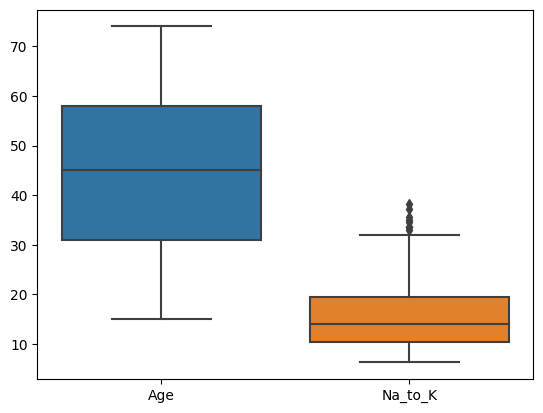

In [100]:
sns.boxplot(df)

<Axes: >

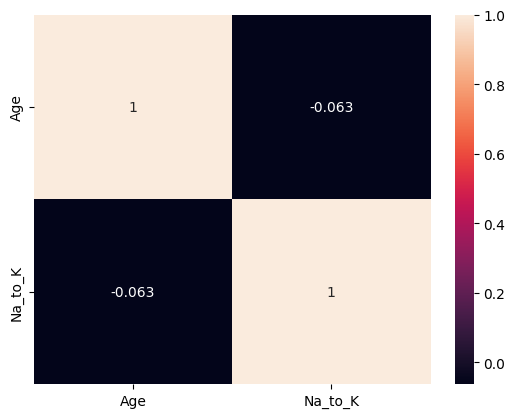

In [101]:
sns.heatmap(df.corr(),annot = True)

<Axes: >

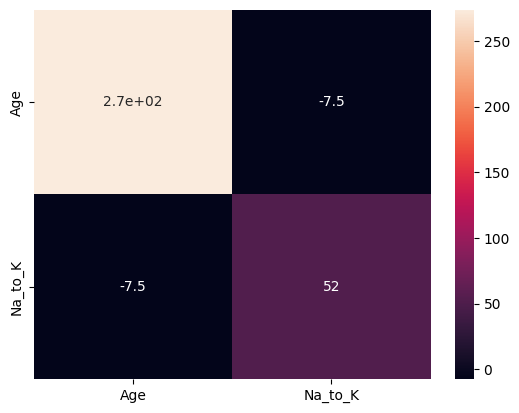

In [102]:
sns.heatmap(df.cov(),annot=True)

<Axes: xlabel='Na_to_K', ylabel='Density'>

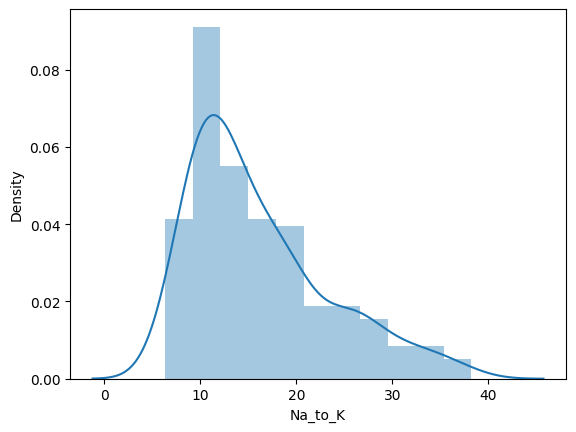

In [103]:
sns.distplot(df['Na_to_K'])

<Axes: xlabel='Age', ylabel='Na_to_K'>

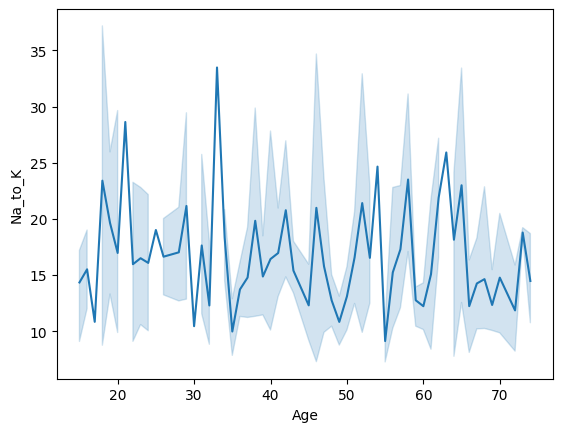

In [104]:
sns.lineplot(x = df['Age'],y = df['Na_to_K'])

In [105]:
# Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])

In [106]:
# Normalize numerical variables
scaler = StandardScaler()
df[['Age', 'Na_to_K']] = scaler.fit_transform(df[['Age', 'Na_to_K']])

In [107]:
#split dependent and independent 
x =df.iloc[:,:5].values
x

array([[-1.29159102,  0.        ,  0.        ,  0.        ,  1.28652212],
       [ 0.16269866,  1.        ,  1.        ,  0.        , -0.4151454 ],
       [ 0.16269866,  1.        ,  1.        ,  0.        , -0.82855818],
       [-0.988614  ,  0.        ,  2.        ,  0.        , -1.14996267],
       [ 1.0110343 ,  0.        ,  1.        ,  0.        ,  0.27179427],
       [-1.35218642,  0.        ,  2.        ,  0.        , -1.03769314],
       [ 0.28388946,  0.        ,  2.        ,  0.        ,  0.02643885],
       [-0.20087376,  1.        ,  1.        ,  0.        , -0.70046821],
       [ 0.9504389 ,  1.        ,  2.        ,  0.        , -0.12676951],
       [-0.07968296,  1.        ,  1.        ,  1.        ,  0.45567206],
       [ 0.16269866,  0.        ,  1.        ,  0.        , -0.59916196],
       [-0.62504158,  0.        ,  0.        ,  1.        ,  0.43221897],
       [-0.07968296,  1.        ,  1.        ,  0.        , -0.09832049],
       [ 1.79877454,  0.        ,  1. 

In [108]:
y = pd.get_dummies(df.iloc[:,5:]).values
y

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1,

In [109]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2, random_state=21)

In [110]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((160, 5), (40, 5), (160, 5), (40, 5))

In [111]:
# Normalize numerical variables
scaler = StandardScaler()
df[['Age', 'Na_to_K']] = scaler.fit_transform(df[['Age', 'Na_to_K']])

TASK 2: BUILD THE ANN MODEL

In [112]:
#ANN model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=x.shape[1]))  # Input layer
model.add(Dense(16, activation='relu'))  # Hidden layer 1
model.add(Dense(8, activation='relu'))  # Hidden layer 2
model.add(Dense(4, activation='relu'))  # Hidden layer 3
model.add(Dense(5, activation='softmax'))  # Output layer

In [113]:
#compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [114]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                192       
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 dense_32 (Dense)            (None, 8)                 136       
                                                                 
 dense_33 (Dense)            (None, 4)                 36        
                                                                 
 dense_34 (Dense)            (None, 5)                 25        
                                                                 
Total params: 917
Trainable params: 917
Non-trainable params: 0
_________________________________________________________________


In [115]:
#train the model
model.fit(xtrain, ytrain, epochs=10, batch_size=5, validation_data=(xtest, ytest))

Epoch 1/10
32/32 [==============================] - 1s 9ms/step - loss: 1.6025 - accuracy: 0.0875 - val_loss: 1.5018 - val_accuracy: 0.1250
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 1.5446 - accuracy: 0.1750 - val_loss: 1.4573 - val_accuracy: 0.1250
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 1.4979 - accuracy: 0.2062 - val_loss: 1.3990 - val_accuracy: 0.1250
Epoch 4/10
32/32 [==============================] - 0s 6ms/step - loss: 1.4407 - accuracy: 0.2438 - val_loss: 1.3282 - val_accuracy: 0.2750
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 1.3606 - accuracy: 0.3812 - val_loss: 1.2185 - val_accuracy: 0.5250
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 1.2523 - accuracy: 0.4437 - val_loss: 1.0937 - val_accuracy: 0.5500
Epoch 7/10
32/32 [==============================] - 0s 4ms/step - loss: 1.1328 - accuracy: 0.4750 - val_loss: 0.9828 - val_accuracy: 0.6500
Epoch 8/10
32/32 [==

TASK 3:TEST THE MODEL WITH RANDOM DATA

In [116]:
ypred=model.predict(xtest)

2/2 [==============================] - 0s 7ms/step


In [117]:
model.predict([[1,0,1,0,1]])

1/1 [==============================] - 0s 101ms/step


array([[9.5398462e-01, 1.0836030e-04, 4.4797573e-02, 5.1054172e-04,
        5.9895252e-04]], dtype=float32)